In [37]:
#Instalo e importo paquetes 
import pandas as pd 

import numpy as np 
import os

from IPython.display import Image, display

import matplotlib.pyplot as plt
import seaborn as sns



In [329]:
#SUBO EL SET DE DATOS INDIVISUALES DEL PRIMER TRIMESTRE DE 2025
t0125 = pd.read_excel('usu_individual_T125.xlsx')


In [330]:

#SUBO EL SET DE DATOS INDIVISUALES DEL PRIMER TRIMESTRE DE 2005
t0105 = pd.read_stata('Individual_t105.dta')

#Seteo el tamaño de las Columnas y Filas que me muestra Jupiter
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows', 20)

#VOY ANALIZANDO LOS TIPOS DE DATOS DE AMBOS DATAFRAMES. PARA ESTABLECER LAS COLUMNAS QUE REQUIEREN RECONVERSION
print(t0105.dtypes)


CODUSU          object
nro_hogar      float64
componente    category
h15           category
ano4           float64
                ...   
adeccfr         object
pj1_1         category
pj2_1         category
pj3_1         category
idimpp          object
Length: 176, dtype: object


In [331]:
print(t0125.dtypes)

CODUSU         object
ANO4            int64
TRIMESTRE       int64
NRO_HOGAR       int64
COMPONENTE      int64
               ...   
P_RDECCF      float64
P_GDECCF      float64
P_PDECCF      float64
P_IDECCF      float64
P_ADECCF      float64
Length: 235, dtype: object


In [332]:

#PRIMERO VOY ESTABLECER LAS FILAS CON LAS QUE ME VOY A QUEDAR, EN LAS 2 TABLAS
#QUE SON LA DE LOS AGLOMERADOS DE LA REGION NOA

categorias = ['Santiago del Estero - La Banda', 'Salta', 'La Rioja', 'Gran Catamarca', 'Jujuy - Palpalá','Gran Tucumán - Tafí Viejo']
Sel_t0105_1 = t0105[t0105['aglomerado'].isin(categorias)].copy()


categorias2 = [18,19,22,23,25,29]
Sel_t0125_1 = t0125[t0125['AGLOMERADO'].isin(categorias2)].copy()

#AHORA VOY ESTABLECER LAS COLUMNAS CON LAS QUE ME VOY A QUEDAR, EN LAS 2 TABLAS

Sel_t0105 = Sel_t0105_1[[
'CODUSU', 'nro_hogar', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch14', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp04b_cod', 'ipcf', 'itf'
]].copy()

Sel_t0125 = Sel_t0125_1[[
'CODUSU', 'NRO_HOGAR', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH14', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP04B_COD', 'IPCF','ITF'
]].copy()



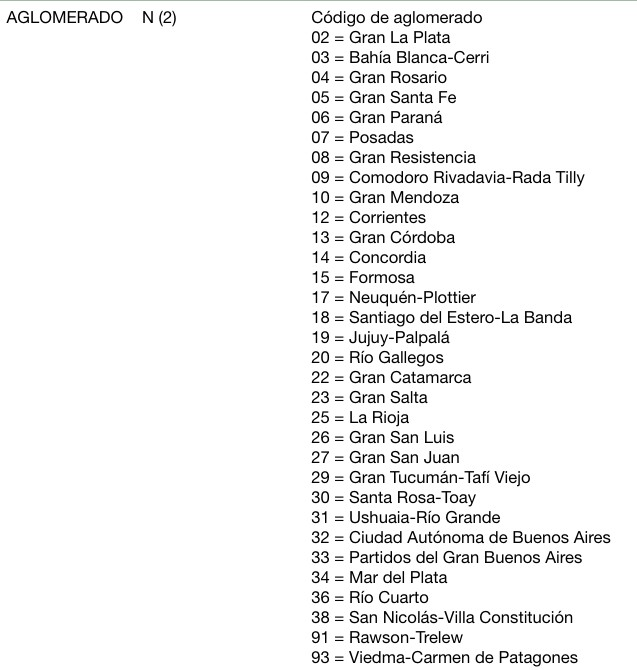

In [333]:
# Aqui empiezo a homogeneizar las bases de datos para poder filtrar y unificarlas.


#AGLOMERADOS: Del listado me voy a quedar solo con la región NOA

display(Image(filename='C:/Users/Rafael/Desktop/tpfinal/BigDataUBA-Grupo3-main/TP1-Grupo3/TP2/inputs/AGLOMERADO.jpg'))



In [334]:
#RECODIFICO LAS COLUMNAS NECESARIAS PARA QUE SE PUEDAN UNIFICAR, FINALMENTE AMBOS DATAFRAMES

# Diccionario del mapeo de los aglomerados pertenecientes al NOA
aglomerado_map = {
    'Santiago del Estero - La Banda': 18,    'Jujuy - Palpalá': 19,
    'Gran Catamarca': 22,    'Salta': 23,
    'La Rioja': 25,          'Gran Tucumán - Tafí Viejo': 29
                }
#Creo esta lista para ir depositando los errores que vaya encontrado la transformacion y después ver qué corregir 
errores = []

#Lo lleva a un tipo de dato que me facilita la transformacion
Sel_t0105['aglomerado'] = Sel_t0105['aglomerado'].astype(str)

#Armo un bucle para que recorra todas las celdas de la columna y vaya tranformando los datos segun el diccionario.
#Para ello utilizo la función .at[] con la que modifico una sola celda en un DataFrame, usando la combinación de índice y nombre de columna.


for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'aglomerado']
    if desc in aglomerado_map:
        Sel_t0105.at[i, 'aglomerado'] = aglomerado_map[desc]
    else:
        errores.append((i, desc))

#una vez recodificado, transformo el tipo de dato para poder ir homogeneizando ambos DF y poder unirlos finalmente

Sel_t0105['aglomerado'] = Sel_t0105['aglomerado'].astype('int64')



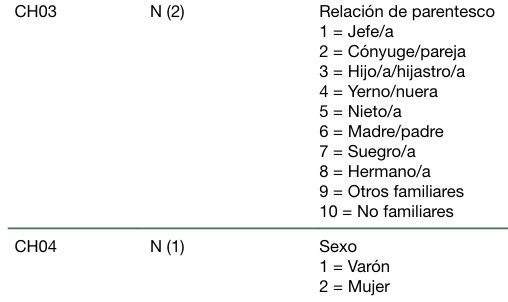

In [335]:
# DE AQUI EN ADELANTE, REPITO EL PROCESO ANTERIOR PARA LAS SIGUINTES COLUMNAS 

#Utilizo como referencia la codificacion de cada columna que figura en los pdf´s EPH_Diccionario 
display(Image(filename=r'C:/Users/Rafael/Desktop/tpfinal/BigDataUBA-Grupo3-main/TP1-Grupo3/TP2/inputs\GP_SEXO.jpg'))


In [336]:

#Defino el diccionario de valores que debe buscar y reemplazar
ch03_map = {
    'Jefe/a': 1,     'Jefe': 1,
    'Cónyuge/pareja': 2,    'Cónyuge/Pareja': 2,
    'Hijo/a/hijastro/a': 3,  'Hijo/Hijastro': 3,
    'Yerno/nuera': 4,        'Yerno/Nuera': 4,
    'Nieto/a': 5,            'Nieto': 5,
    'Madre/padre': 6,         'Madre/Padre': 6,
    'Suegro/a': 7,             'Suegro': 7,
    'Hermano/a': 8,              'Hermano': 8,
    'Otros familiares': 9,
    'No familiares': 10
}

errores = []

#Para el 2005
Sel_t0105['ch03'] = Sel_t0105['ch03'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'ch03']
    if desc in ch03_map:
        Sel_t0105.at[i, 'ch03'] = ch03_map[desc]
    else:
        errores.append((i, desc))


#una vez recodificado transformo el tipo de dato a numerico
Sel_t0105['ch03'] = pd.to_numeric(Sel_t0105['ch03'], errors='coerce')


In [337]:
# tomare a la variable sexo de SEXO con una Dummies, en los 2 años, recodificandola en 0 y 1.

Sel_t0105['ch04'] = np.where(Sel_t0105['ch04'] == 'Varón', 1, 0)

Sel_t0125['CH04'] = np.where(Sel_t0125['CH04'] == 1,1,0)

#una vez recodificado transformo el tipo de dato
Sel_t0105['ch04'] = Sel_t0105['ch04'].astype('int64')


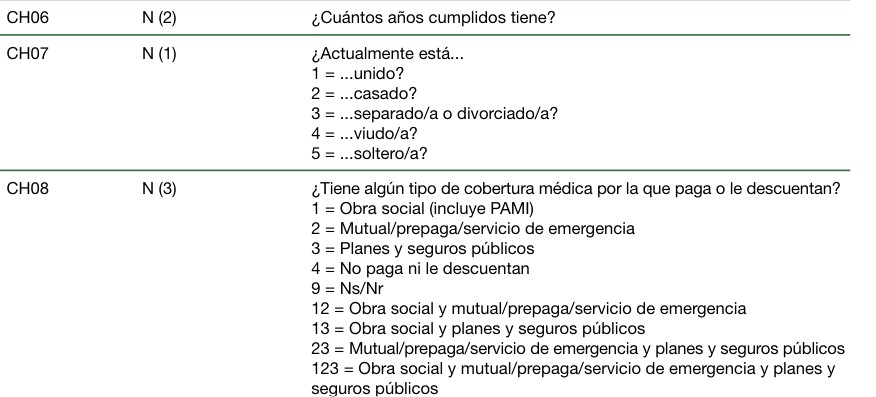

In [338]:
display(Image(filename=r'C:\Users\Rafael\Desktop\tpfinal\BigDataUBA-Grupo3-main\TP1-Grupo3\TP2\inputs\EDAD_ECIVIL_OS.jpg'))

In [339]:
# Para el punto 2.C
#Excluimos los valores de EDAD-ch06 fuera de rango, que son aquellos de menos de un año y los mayores de 98 .. Pueden ser errores de carga

###########################################
#Para el 2005
Sel_t0105['ch06'] = Sel_t0105['ch06'].astype(str)

Sel_t0105 = Sel_t0105.loc[
    (Sel_t0105['ch06'] != 'Menos de 1 año') & 
    (Sel_t0105['ch06'] != '98 y más años')
]

Sel_t0105['ch06'] = pd.to_numeric(Sel_t0105['ch06'], errors='coerce')

###########################################

#Para el 2025
Sel_t0125['CH06'] = Sel_t0125['CH06'].astype(str)

Sel_t0125 = Sel_t0125.loc[
    (Sel_t0125['CH06'] != 'Menos de 1 año') & 
    (Sel_t0125['CH06'] != '98 y más años') &
    (Sel_t0125['CH06'] != '103') &
    (Sel_t0125['CH06'] != '-1') 
]

#una vez recodificado transformo el tipo de dato
Sel_t0125['CH06'] = pd.to_numeric(Sel_t0125['CH06'], errors='coerce')


In [340]:

#Para estado civil

ch07_map = {'Unido':1, 'Casado':2, 'Separado o divorciado':3, 'Viudo':4, 'Soltero':5  }


Sel_t0105['ch07'] = Sel_t0105['ch07'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'ch07']
    if desc in ch07_map:
        Sel_t0105.at[i, 'ch07'] = ch07_map[desc]
    else:
        errores.append((i, desc))

#una vez recodificado transformo el tipo de dato
Sel_t0105['ch07'] = Sel_t0105['ch07'].astype('int64')

In [341]:
#Para cobertura medica

#Diccionario para transformar
ch08_map = {
'Obra social (incluye PAMI)':1, 'Mutual/Prepaga/Servicio de emergencia':2, 'Planes y seguros públicos':3, 'No paga ni le descuentan':4, 'Ns./Nr.':9, 
'Obra social y mutual/prepaga/servicio de emergencia':12, 'Obra social y planes y seguros públicos':13, 
'Mutual /prepaga / servicio de emergencia / Planes y Seguros Públicos':23, 
'Obra social, mutual / prepaga / servicio de emergencia y Planes y Seguros Públicos':123
}

Sel_t0105['ch08'] = Sel_t0105['ch08'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'ch08']
    if desc in ch08_map:
        Sel_t0105.at[i, 'ch08'] = ch08_map[desc]
    else:
        errores.append((i, desc))


Sel_t0105['ch08'] = pd.to_numeric(Sel_t0105['ch08'], errors='coerce')


In [342]:
#Para el último año que aprobo

#Primero lo llevo a string para despues llevarlo a numerico al campo del ultimo curso aprobado

Sel_t0105['ch14'] = Sel_t0105['ch14'].str.strip()

Sel_t0105['ch14'] = pd.to_numeric(Sel_t0105['ch14'], errors='coerce')


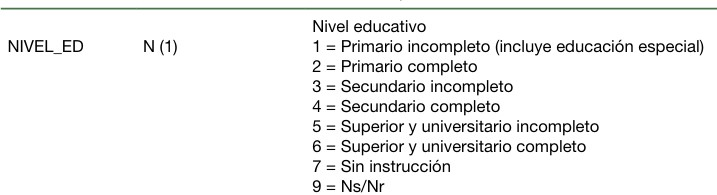

In [343]:
display(Image(filename=r'C:\Users\Rafael\Desktop\tpfinal\BigDataUBA-Grupo3-main\TP1-Grupo3\TP2\inputs\N_EDUC.jpg'))

In [344]:
#Para el Nivel educativo

nivel_ed_map = {'Primaria Completa':2, 'Primaria Incompleta (incluye educación especial)':1, 'Secundaria Completa':4, 
            'Secundaria Incompleta':3, 'Sin instrucción':7, 'Superior Universitaria Completa':6, 
            'Superior Universitaria Incompleta':5, 'Ns/Nr':9
           }

Sel_t0105['nivel_ed'] = Sel_t0105['nivel_ed'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'nivel_ed']
    if desc in nivel_ed_map:
        Sel_t0105.at[i, 'nivel_ed'] = nivel_ed_map[desc]
    else:
        errores.append((i, desc))


Sel_t0105['nivel_ed'] = pd.to_numeric(Sel_t0105['nivel_ed'], errors='coerce')



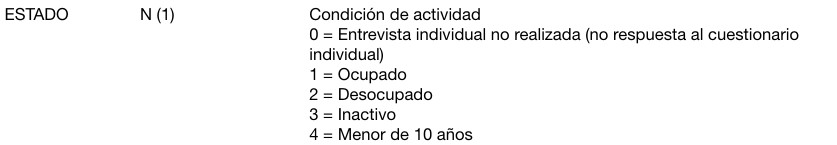

In [345]:
display(Image(filename=r"C:\Users\Rafael\Desktop\tpfinal\BigDataUBA-Grupo3-main\TP1-Grupo3\TP2\inputs\EST_LABORAL.jpg"))

In [346]:
#Para la condicion de actividad

estado_map = {'Entrevista individual no realizada (no respuesta al cuestion':0, 
                'Ocupado':1, 'Desocupado':2, 'Inactivo':3, 'Menor de 10 años':4
               }

Sel_t0105['estado'] = Sel_t0105['estado'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'estado']
    if desc in estado_map:
        Sel_t0105.at[i, 'estado'] = estado_map[desc]
    else:
        errores.append((i, desc))


Sel_t0105['estado'] = pd.to_numeric(Sel_t0105['estado'], errors='coerce')


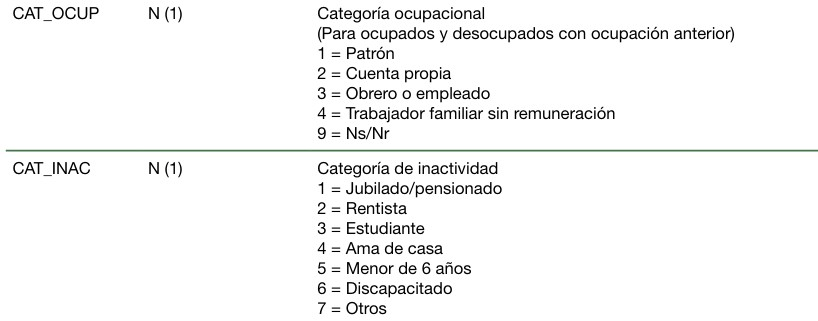

In [347]:
display(Image(filename=r"C:\Users\Rafael\Desktop\tpfinal\BigDataUBA-Grupo3-main\TP1-Grupo3\TP2\inputs\OCUP_DESOCUP.jpg"))

In [348]:
#Para la categoria ocupacional

cat_ocup_map = {'Patrón':1, 'Cuenta propia':2, 'Obrero o empleado':3,
              'Trabajador familiar sin remuneración':4,'Nr/Nr':9
             }

errores = []

Sel_t0105['cat_ocup'] = Sel_t0105['cat_ocup'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'cat_ocup']
    if desc in cat_ocup_map:
        Sel_t0105.at[i, 'cat_ocup'] = cat_ocup_map[desc]
    else:
        errores.append((i, desc))


Sel_t0105['cat_ocup'] = pd.to_numeric(Sel_t0105['cat_ocup'], errors='coerce')

#Como el valor "0" no esta tipificado dentro de los cuadros de referencia, lo reemplazare por un valor nulo. Para los puntos 2.b y 2.c
Sel_t0105['cat_ocup'] = Sel_t0105['cat_ocup'].replace(0, np.nan)
Sel_t0125['CAT_OCUP'] = Sel_t0125['CAT_OCUP'].replace(0, np.nan)




In [349]:
#Para la categoria de inactividad

cat_inac_map = {'Ama de casa':4, 'Discapacitado':6, 'Estudiante':3, 'Jubilado/pensionado':1, 
                'Menor de 6 años':5, 'Otros':7, 'Rentista':2
                 }

Sel_t0105['cat_inac'] = Sel_t0105['cat_inac'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'cat_inac']
    if desc in cat_inac_map:
        Sel_t0105.at[i, 'cat_inac'] = cat_inac_map[desc]
    else:
        errores.append((i, desc))


Sel_t0105['cat_inac'] = pd.to_numeric(Sel_t0105['cat_inac'], errors='coerce')

Sel_t0125['CAT_INAC'] = pd.to_numeric(Sel_t0125['CAT_INAC'], errors='coerce')


In [350]:
# Se termina de limpiar datos de ambas bases. Para puntos 2.b y 2.c

#Como el valor "0" no esta tipificado dentro de los cuadros de referencia, lo reemplazare por un valor nulo

Sel_t0105['cat_inac'] = Sel_t0105['cat_inac'].replace(0, np.nan)
Sel_t0125['CAT_INAC'] = Sel_t0125['CAT_INAC'].replace(0, np.nan)

#Como en 2025, la columna de esta columna no figura como nulo pero en la de 2025 si, voy transformar el dato de 2005


Sel_t0105['pp04b_cod'] = pd.to_numeric(Sel_t0105['pp04b_cod'], errors='coerce')
Sel_t0105['pp04b_cod'] = Sel_t0105['pp04b_cod'].replace(0, np.nan)

#Porque sino despues no voy a poder concatenar los 2 Dataframes 
Sel_t0125['PP04B_COD'] = pd.to_numeric(Sel_t0125['PP04B_COD'], errors='coerce')



In [351]:
#Tengo que renombrar las columnas para que ambos dataframes tengan igual nombre porque sino 
#no voy a poder poder concatenar correctamente (en la misma columna, una abajo de la otra)los 2 DataFrames

Sel_t0105 = Sel_t0105.rename(columns={
'nro_hogar': 'NRO_HOGAR',
'aglomerado': 'AGLOMERADO',
'pondera': 'PONDERA',
'ch03': 'CH03',
'ch04': 'CH04',
'ch06': 'CH06',
'ch07': 'CH07',
'ch08': 'CH08',
'ch14': 'CH14',
'nivel_ed': 'NIVEL_ED',
'estado': 'ESTADO',
'cat_ocup': 'CAT_OCUP',
'cat_inac': 'CAT_INAC',
'pp04b_cod': 'PP04B_COD',
'ipcf': 'IPCF',
'itf':'ITF'    
})

print(Sel_t0105.dtypes)



CODUSU         object
NRO_HOGAR     float64
AGLOMERADO      int64
PONDERA       float64
CH03            int64
CH04            int64
CH06          float64
CH07            int64
CH08            int64
CH14          float64
NIVEL_ED        int64
ESTADO          int64
CAT_OCUP      float64
CAT_INAC      float64
PP04B_COD     float64
IPCF          float64
ITF           float64
dtype: object


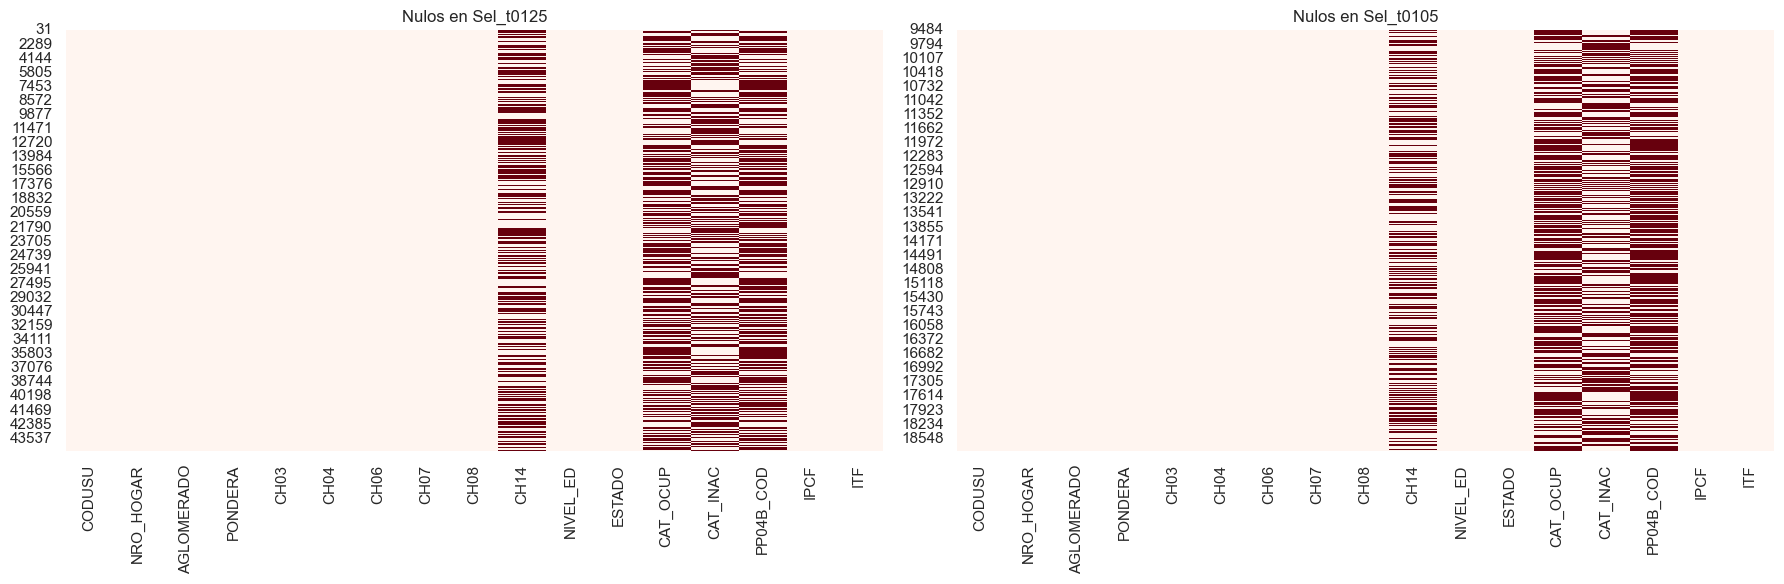

Nulos en Sel_t0125:
CODUSU           0
NRO_HOGAR        0
AGLOMERADO       0
PONDERA          0
CH03             0
CH04             0
CH06             0
CH07             0
CH08             0
CH14          4784
NIVEL_ED         0
ESTADO           0
CAT_OCUP      5167
CAT_INAC      4592
PP04B_COD     5337
IPCF             0
ITF              0
dtype: int64

Nulos en Sel_t0105:
CODUSU           0
NRO_HOGAR        0
AGLOMERADO       0
PONDERA          0
CH03             0
CH04             0
CH06             0
CH07             0
CH08             0
CH14          4010
NIVEL_ED         0
ESTADO           0
CAT_OCUP      5420
CAT_INAC      3875
PP04B_COD     5767
IPCF             0
ITF              0
dtype: int64


In [352]:
#Ahora paso a analizar los nulos de las columnas de ambos DataFrames. Punto 2.b

# Figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Aqui elijo el estilo
sns.set(style="whitegrid")


# Mapas de calor para las Selecciones

# Para 2025
sns.heatmap(Sel_t0125.isnull(), cbar=False, ax=axes[0], cmap="Reds")
axes[0].set_title("Nulos en Sel_t0125")

# Para 2005
sns.heatmap(Sel_t0105.isnull(), cbar=False, ax=axes[1], cmap="Reds")
axes[1].set_title("Nulos en Sel_t0105")


#Junto los 2 Mapas para verlos 
plt.tight_layout()
plt.show()

#Creo una tabla con un conteo de nulos en las columnas que le den fundamento al comentario pedido en el 2.b

print("Nulos en Sel_t0125:")
print(Sel_t0125.isnull().sum())

print("\nNulos en Sel_t0105:")
print(Sel_t0105.isnull().sum())

In [353]:
#Ahora uno a las 2 bases de datos individuales del 2.a

Sel_indiv = pd.concat([Sel_t0125, Sel_t0105], axis=0, ignore_index=True)
#Sel_indiv= Sel_t0125.append(Sel_t0105)

Sel_indiv


,CODUSU,NRO_HOGAR,AGLOMERADO,PONDERA,CH03,CH04,CH06,CH07,CH08,CH14,NIVEL_ED,ESTADO,CAT_OCUP,CAT_INAC,PP04B_COD,IPCF,ITF
0,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,19,200.0,1,0,73.0,5,1.0,NaN,2,3,NaN,1.0,NaN,198750.0,1590000.0
1,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,19,200.0,3,0,38.0,5,1.0,NaN,4,1,3.0,NaN,9700.0,198750.0,1590000.0
2,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,19,200.0,5,0,34.0,5,1.0,NaN,6,1,3.0,NaN,9700.0,198750.0,1590000.0
3,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,19,200.0,5,1,19.0,5,1.0,2.0,3,3,NaN,7.0,NaN,198750.0,1590000.0
4,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,19,200.0,5,1,16.0,5,1.0,NaN,2,3,NaN,7.0,NaN,198750.0,1590000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18867,287879,1.0,29,266.0,3,0,10.0,5,2.0,4.0,1,3,NaN,3.0,NaN,130.0,390.0
18868,288077,1.0,29,555.0,1,1,31.0,2,1.0,NaN,6,1,3.0,NaN,5306.0,562.5,2250.0
18869,288077,1.0,29,555.0,2,0,29.0,2,1.0,NaN,6,3,NaN,4.0,NaN,562.5,2250.0
18870,288077,1.0,29,555.0,3,1,4.0,5,1.0,NaN,7,4,NaN,5.0,NaN,562.5,2250.0


In [354]:
#NO VA - Solo para revisar las transformaciones en excel

##############################################################

#destino
carpeta2 = r'C:\Users\Rafael\Desktop\tpfinal\BigDataUBA-Grupo3-main\TP1-Grupo3\TP2\outputs'

#2005
# Asi se llamara el excel
archivo_nombre = "sel_t0105.xlsx"

destino = os.path.join(carpeta2, archivo_nombre)

# Guardo el archivo
Sel_t0105.to_excel(destino, index=False)
##############################################################
#2025

archivo_nombre = "sel_t0125.xlsx"

destino = os.path.join(carpeta2, archivo_nombre)

Sel_t0125.to_excel(destino, index=False)
##############################################################
#UNION

archivo_nombre = "Sel_indiv.xlsx"

destino = os.path.join(carpeta2, archivo_nombre)

Sel_indiv.to_excel(destino, index=False)


In [355]:
#importo los datos trabajdos en el primer punto de 2005 y 2025
df2005 = Sel_t0105.copy()
df2025 = Sel_t0125.copy()


In [356]:
#calculamos el porcentaje de muejers y hombres para cada año

por_var_2005 = (df2005['CH04'] == 1).mean() * 100
por_muj_2005 = 100 - por_var_2005
por_var_2025 = (df2025['CH04'] == 1).mean() * 100
por_muj_2025 = 100 - por_var_2025
print(por_var_2005)
print(por_var_2025)
print(por_muj_2005)
print(por_muj_2025)

48.224787627967764
47.997936016511865
51.775212372032236
52.002063983488135


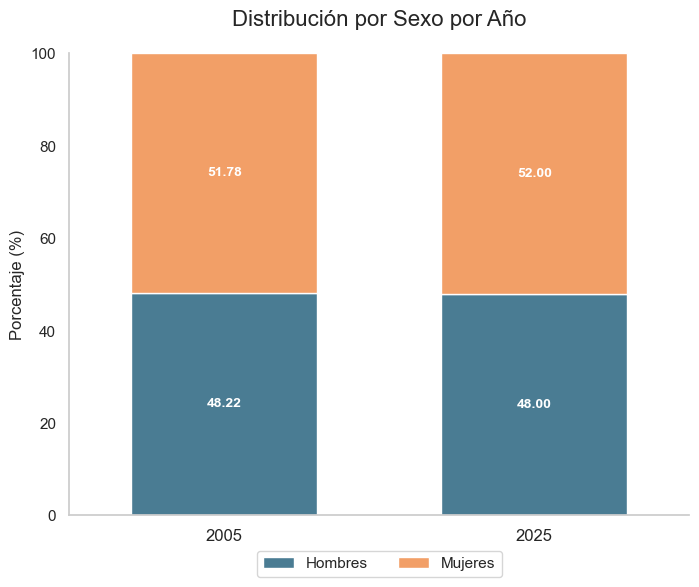

In [357]:
# --- Configuración del gráfico ---
labels = ['2005', '2025']
porcentajes_hombres = [por_var_2005, por_var_2025]
porcentajes_mujeres = [por_muj_2005, por_muj_2025]
width = 0.6  # Ancho de las barras

fig, ax = plt.subplots(figsize=(8, 6))
x = np.arange(len(labels))

# --- Dibujar la barra de hombres ---
ax.bar(x, porcentajes_hombres, width, label='Hombres', color='#4A7C93')

# --- Dibujar la barra de mujeres (apilada) ---
ax.bar(x, porcentajes_mujeres, width, bottom=porcentajes_hombres, label='Mujeres', color='#F29F67')

# --- Añadir los valores de porcentaje en el gráfico ---
def add_labels(bar_container):
    for rect in bar_container:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, rect.get_y() + height / 2),
                    xytext=(0, 0),
                    textcoords="offset points",
                    ha='center', va='center', fontsize=10, color='white', fontweight='bold')

add_labels(ax.containers[0])
add_labels(ax.containers[1])

# --- Personalizar el gráfico ---
ax.set_ylabel('Porcentaje (%)', fontsize=12)
ax.set_title('Distribución por Sexo por Año', fontsize=16, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.set_ylim(0, 100)
ax.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0)
ax.set_xlim(-0.5, 1.5)

plt.show()


In [366]:
#En primer lugar vamos a crear las variables dicotomicas para cada variable.
import pandas as pd
import numpy as np

# Convertimos las variables categóricas a dummies
df_2005_dummies = pd.get_dummies(df2005, columns=['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC'], dtype=int)
df_2025_dummies = pd.get_dummies(df2025, columns=['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC'], dtype=int)

df_2025_dummies = df_2025_dummies.rename(columns={
    'CH06': 'Edad',
    'CH04_1': 'Hombre', 'CH04_0': 'Mujer',
    'CH07_1': 'Unido', 'CH07_2': 'Casado', 'CH07_3': 'Separado_Divorciado', 'CH07_4': 'Viudo', 'CH07_5': 'Soltero',
    'CH08_1.0': 'Obra_Social', 'CH08_2.0': 'Mutual_Prepaga', 'CH08_3.0': 'Planes_Seguros_Publicos','CH08_4.0':'No_paga_Ni_desc','CH08_9.0': 'Ns/Nr','CH08_12.0':'obra_y_prep_mut_serv','CH08_13.0':'Obra_soc_y_prep', 'CH08_23.0':'Mun_prep_serv',
    'NIVEL_ED_1': 'Prim_inco', 'NIVEL_ED_2': 'Prim_comp', 'NIVEL_ED_3': 'Sec_inc','NIVEL_ED_4': 'sec_com','NIVEL_ED_5': 'sup_comp','NIVEL_ED_6': 'Sup_inc','NIVEL_ED_7': 'Sin_instr','NIVEL_ED_9': 'No_responde',
    'ESTADO_0': 'No_resp' ,'ESTADO_1': 'Ocupado', 'ESTADO_2': 'Desocupado', 'ESTADO_3': 'Inactivo','ESTADO_4': 'Menor_10',
    'CAT_INAC_1.0': 'Jubilado', 'CAT_INAC_2.0':'Rentista' ,'CAT_INAC_3.0':'Estudiante','CAT_INAC_4.0':'Ama_de_casa','CAT_INAC_5.0':'Menor_6','CAT_INAC_6.0':'discapacitado','CAT_INAC_7.0':'Varios',
    'CH06': 'edad'
})


df_2005_dummies = df_2005_dummies.rename(columns={
    'CH06': 'Edad',
    'CH04_1': 'Hombre', 'CH04_0': 'Mujer',
    'CH07_1': 'Unido', 'CH07_2': 'Casado', 'CH07_3': 'Separado_Divorciado', 'CH07_4': 'Viudo', 'CH07_5': 'Soltero',
    'CH08_1': 'Obra_Social', 'CH08_2': 'Mutual_Prepaga', 'CH08_3': 'Planes_Seguros_Publicos','CH08_4':'No_paga_Ni_desc','CH08_9': 'Ns/Nr','CH08_12':'obra_y_prep_mut_serv','CH08_13':'Obra_soc_y_prep',
    'NIVEL_ED_1': 'Prim_inco', 'NIVEL_ED_2': 'Prim_comp', 'NIVEL_ED_3': 'Sec_inc','NIVEL_ED_4': 'sec_com','NIVEL_ED_5': 'sup_comp','NIVEL_ED_6': 'Sup_inc','NIVEL_ED_7': 'Sin_instr','NIVEL_ED_9': 'No_responde',
    'ESTADO_0': 'No_resp' ,'ESTADO_1': 'Ocupado', 'ESTADO_2': 'Desocupado', 'ESTADO_3': 'Inactivo','ESTADO_4': 'Menor_10',
    'CAT_INAC_1.0': 'Jubilado', 'CAT_INAC_2.0':'Rentista' ,'CAT_INAC_3.0':'Estudiante','CAT_INAC_4.0':'Ama_de_casa','CAT_INAC_5.0':'Menor_6','CAT_INAC_6.0':'discapacitado','CAT_INAC_7.0':'Varios',
    'CH06': 'edad'
})




In [367]:
df_2025_dummies

,CODUSU,NRO_HOGAR,AGLOMERADO,PONDERA,CH03,edad,CH14,CAT_OCUP,PP04B_COD,IPCF,ITF,Mujer,Hombre,Unido,Casado,Separado_Divorciado,Viudo,Soltero,Obra_Social,Mutual_Prepaga,Planes_Seguros_Publicos,No_paga_Ni_desc,Ns/Nr,obra_y_prep_mut_serv,Obra_soc_y_prep,Mun_prep_serv,Prim_inco,Prim_comp,Sec_inc,sec_com,sup_comp,Sup_inc,Sin_instr,No_resp,Ocupado,Desocupado,Inactivo,Menor_10,Jubilado,Rentista,Estudiante,Ama_de_casa,Menor_6,discapacitado,Varios
31,TQRMNORWTHJOKOCDEGPDJ00875828,1,19,200,1,73,NaN,NaN,NaN,198750.0,1590000,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
32,TQRMNORWTHJOKOCDEGPDJ00875828,1,19,200,3,38,NaN,3.0,9700.0,198750.0,1590000,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
33,TQRMNORWTHJOKOCDEGPDJ00875828,1,19,200,5,34,NaN,3.0,9700.0,198750.0,1590000,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
34,TQRMNORWTHJOKOCDEGPDJ00875828,1,19,200,5,19,2.0,NaN,NaN,198750.0,1590000,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
35,TQRMNORWTHJOKOCDEGPDJ00875828,1,19,200,5,16,NaN,NaN,NaN,198750.0,1590000,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45364,TQRMNOQYSHMKKRCDEHIBB00882443,1,22,184,1,90,NaN,NaN,NaN,1250000.0,3750000,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
45365,TQRMNOQYSHMKKRCDEHIBB00882443,1,22,184,3,60,NaN,3.0,8501.0,1250000.0,3750000,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
45366,TQRMNOQYSHMKKRCDEHIBB00882443,1,22,184,5,22,3.0,NaN,NaN,1250000.0,3750000,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
45367,TQRMNOPPVHKOKSCDEHIBB00860370,1,22,108,1,25,NaN,3.0,5601.0,537500.0,1075000,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [369]:
### creamos la base de datos para hacer la matriz de correlacion.
varnum = ['edad', 'IPCF']

# Usamos .iloc para seleccionar el rango y .columns.tolist() para obtener sus nombres
columnas_rango_nombres_2005 = df_2005_dummies.iloc[:, 10:].columns.tolist()
columnas_rango_nombres_2025 = df_2005_dummies.iloc[:, 10:].columns.tolist()


# 3. Combinamos ambas listas de nombres
columnas_finales_2005 = varnum + columnas_rango_nombres_2005
columnas_finales_2025 = varnum + columnas_rango_nombres_2025


# 4. Creamos el nuevo DataFrame con todas las columnas seleccionadas
df_seleccionado_2005 = df_2005_dummies[columnas_finales_2005]
df_seleccionado_2025 = df_2025_dummies[columnas_finales_2025]



<Axes: >

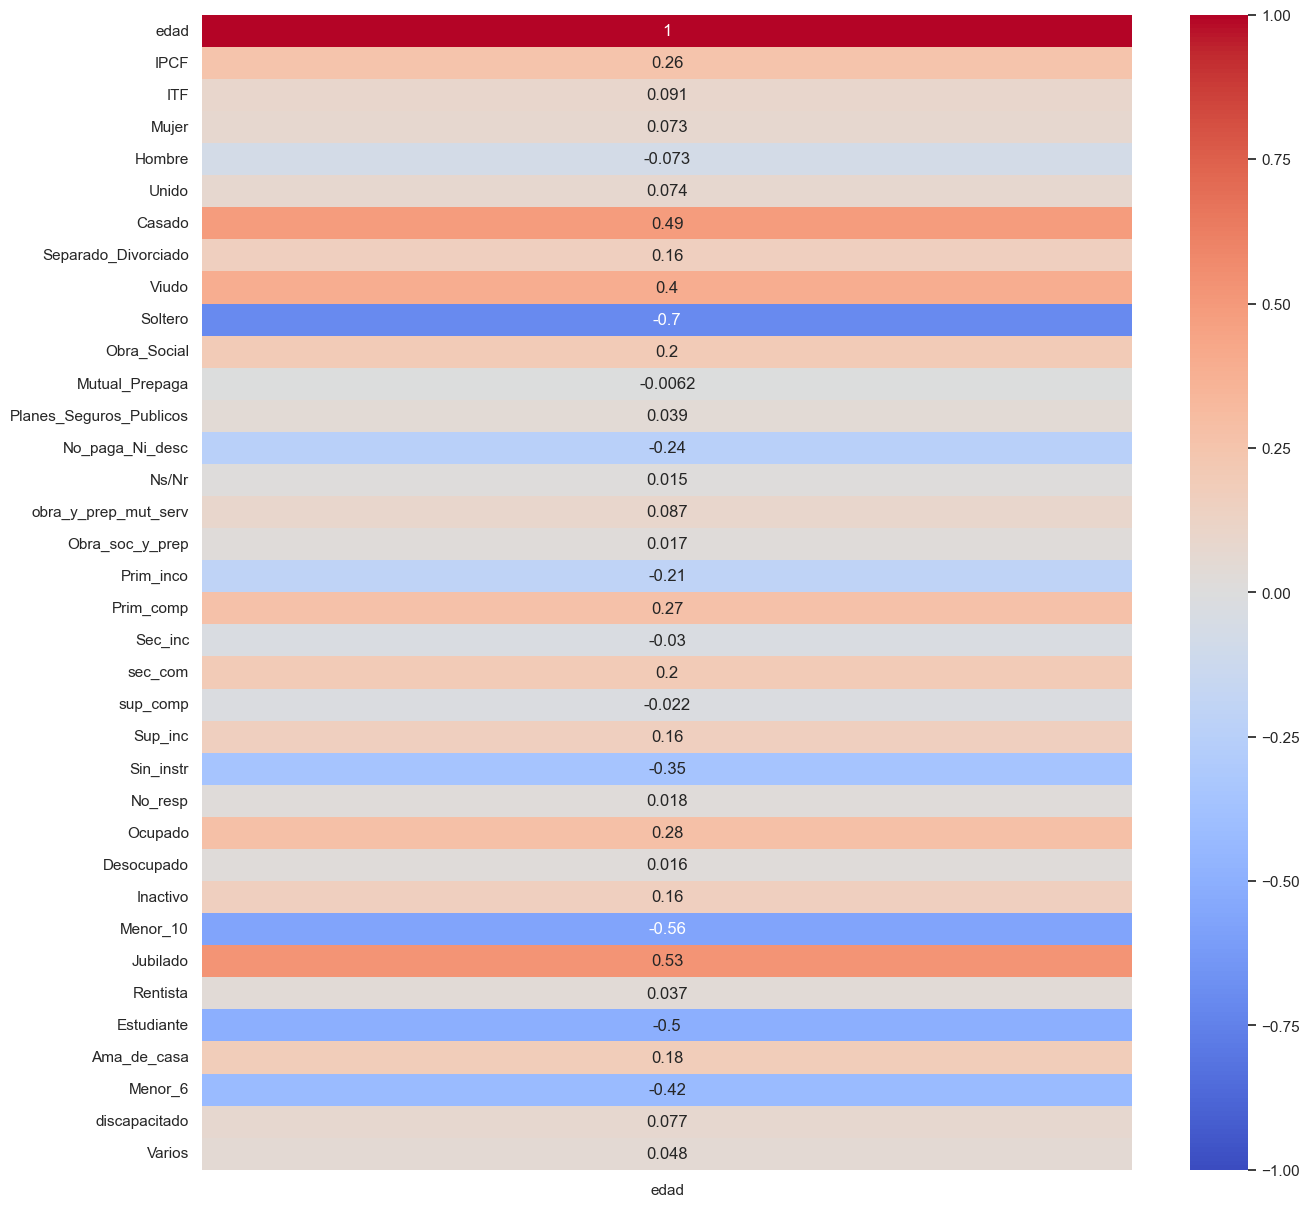

In [371]:
###creamos el grafico de correlaciones para cada año

upp_mat = np.triu(df_seleccionado_2005.corr())
plt.figure(figsize=(15, 15))
sns.heatmap(df_seleccionado_2005.corr()[["edad"]], vmin=-1, vmax=+1, annot=True, cmap="coolwarm")

## Parte 3

In [372]:
### A partir de la creacion de las variables dummies puedo calcular la cantidad de gente que no respondio la encuesta

no_resp_2005 = df_2005_dummies['No_resp'].sum()
no_resp_2025 = df_2025_dummies['No_resp'].sum()
print(no_resp_2005)
print(no_resp_2025)


8
16


In [375]:
## separamos las dos bases de datos
respondieron = Sel_indiv[Sel_indiv['ITF'] != 0]  
norespondieron = Sel_indiv[Sel_indiv['ITF'] == 0] 

## separamos para cada año 

respondieron2005 = Sel_t0105[Sel_t0105['ITF'] != 0]  
norespondieron2005 = Sel_t0105[Sel_t0105['ITF'] == 0] 

respondieron2025 = Sel_t0125[Sel_t0125['ITF'] != 0]  
norespondieron2025 = Sel_t0125[Sel_t0125['ITF'] == 0] 
